# Circle & Torus

In [1]:
using Pkg
Pkg.activate("../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [2]:
include("../src/analogous_bars.jl")
include("../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Plots
using CSV
using Distances
using HDF5


WebIO._IJuliaInit()

# 1. Load data 

In [3]:
# directory
directory = "data/circle_torus/"

# load points. Coordinates are on a square torus
P = h5read(directory * "coords.h5", "circle")
Q = h5read(directory * "coords.h5", "torus")

# print number of points 
print("number of points in P: ", size(P,1), "\n")
print("number of points in Q: ", size(Q,1))

# load distance matrices
D_P = readdlm(directory * "distance_circle.csv")
D_Q = readdlm(directory * "distance_torus.csv")
D_P_Q = readdlm(directory * "distance_circle_torus.csv")
D_Q_P = readdlm(directory * "distance_torus_circle.csv");
     

number of points in P: 20
number of points in Q: 300

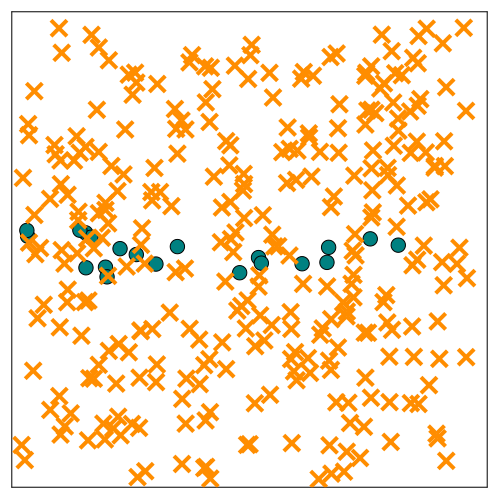

In [4]:
# plot P
p = plot(framestyle = :box, yaxis = nothing, xaxis = nothing,
        size = (500, 500), xlim = (-0.1, 6.5), ylim = (-0.1, 6.5))

scatter!(p,P[:,1], P[:,2], color = "#008181", 
            label = "", 
            markersize = 8, 
            marker = :circle)

# plot Q
scatter!(p, Q[:,1], Q[:,2], color = "#ff8d00", 
            label = "", 
            markersize = 8, 
            marker = :xcross,
            markerstrokewidth = 4
            )
#savefig("data/circle_torus/points.pdf")
plot(p)

In [5]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim);

In [6]:
# compute PD
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1);

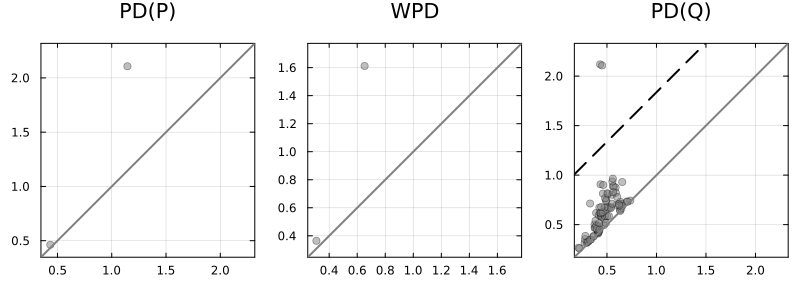

In [7]:
# plot all PD
p1 = plot_PD(barcode_VR_P, 
            title = "PD(P)")
p2 = plot_PD(barcode_W_P, title = "WPD")

selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)
p3 = plot_PD(barcode_VR_Q, title = "PD(Q)", cutoff = cutoff_Q)
plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

# Run analogous cycles

In [8]:
# compute analogous cycles
analogous_P, analogous_Q = run_baseline_similarity_analogous(;
                                                                VR_P = VR_P,
                                                                D_P = D_P, 
                                                                VR_Q = VR_Q,
                                                                D_Q = D_Q, 
                                                                W_PQ = W_P, 
                                                                W_PQ_bars = [1,2]);

# Organize output 
analogous_P_significant, analogous_Q_significant = analogous_cycles_significant(analogous_P, analogous_Q, significant_Q = selected_Q)

# print results
for k in keys(analogous_P_significant)
    println("*** Printing analogous pair *** ")
    println("In P: ", analogous_P_significant[k])
    println("In Q: ", analogous_Q_significant[k])
end 

*** Printing analogous pair *** 
In P: [1]
In Q: nothing
*** Printing analogous pair *** 
In P: [2]
In Q: [84]


So there is one analogous pair, given by (2, 84)

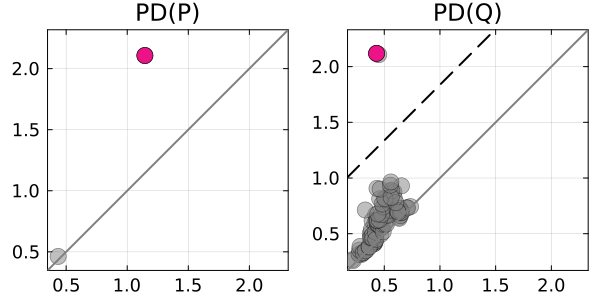

In [9]:
# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = [2],
            title = "PD(P)", 
            titlefontsize = 16,
            tickfontsize = 12,
            markersize = 9)

p2 = plot_PD(barcode_VR_Q; 
            highlight = [84],
            title = "PD(Q)", 
            cutoff = cutoff_Q,
            markersize = 9,
            tickfontsize = 12,
            titlefontsize = 16)

plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/circle_torus/analogous_cycles.pdf")

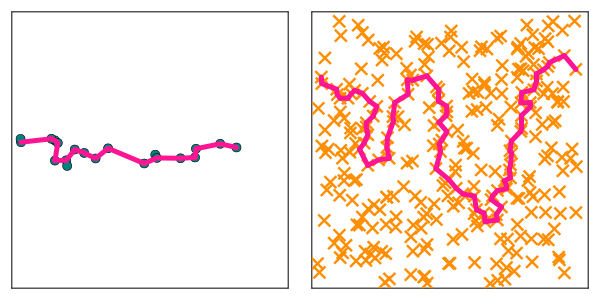

In [10]:
cr_P = get_cyclerep_Eirene(VR_P, 2)
cr_Q = get_cyclerep_Eirene(VR_Q, 84)

p1 = plot_cycle_single_square_torus(P, cycle = cr_P, title = ""; 
                                    legend = false,
                                    cycle_color = :deeppink,
                                    markersize = 5,
                                    c = "#008181",
                                    xlim = (-0.1, 6.5), ylim = (-0.1, 6.5))
p2 = plot_cycle_single_square_torus(Q, cycle = cr_Q, title = ""; 
                                    markersize = 6, 
                                    marker = :xcross,
                                    cycle_color = :deeppink,
                                    markerstrokewidth = 4,
                                    c = "#ff8d00",
                                    xlim = (-0.1, 6.5), ylim = (-0.1, 6.5),
                                    legend = false)

plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/circle_torus/analogous_cycle_rep.pdf")